## **Part 1: Data Clearning/Understanding**


## **Data Transformations & Assumptions**

* **Manager_ID**
  * **Action**: None
  * **Assumption**: All values appear correct with no duplicates
* **First_Name**
  * **Action**: Remove
  * **Assumption**: Names aren't necessary for calculations
* **Last_Name**
  * **Action**: Remove
  * **Asumption**: Names aren't necessary for calculations
* **Age**
  * **Action**: Remove
  * **Assumption**: Ethical concerns with agism.
* **Time_Employed**
  * **Action**: Correcting values and standardizing them all to the same numerical format.
  * **Assumption**: 'O' was changed to '0' because it was assumed that 'O' indicated '0'.
* **Num_Prev_Positions**
  * **Action**: Standardize all the values to the same numerical format.
  * **Assumption**: 'three' was changed to '3' because it was assumed that 'three' indicated '3'.
* **Teamwork**
  * **Action**: None
  * **Assumption**: All values appear correct.
* **Motivation**
  * **Action**: None
  * **Assumption**: All values appear correct.
* **Leadership**
  * **Action**: Standardize all the values to the same 1-10 numerical scale.
  * **Assumption**: '100' was changed to '10' because it was assumed that '100' indicated '10'.
* **Performance_Evaluation**
  * **Action_1**: Change 'highgh' to 'high'.
  * **Assumption_1**: 'highgh' was changed to 'high' because it was assumed that 'highgh' indicated 'high'
  * **Action_2**: Change 'loow' to 'low'.
  * **Assumption_2**: 'loow' was changed to 'low' because it was assumed that 'loow' indicated 'low'.
  * **Action_3**: none
  * **Assumption_3**:All values appear correct.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/lincolnwhiting/Git Portfolio/Datasets/manager_performance.csv")
df.head()

,Manager_ID,First_Name,Last_Mame,Age,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,James,Butt,44,8,2,4,10,8,high
1,2,Josephine,Darakjy,49,4,3,8,7,8,high
2,3,Art,Venere,70,3,3,1,7,5,low
3,4,Lenna,Paprocki,34,9,1,4,4,5,low
4,5,Donette,Foller,39,7,3,3,2,10,low


In [3]:
df = df.drop(columns = ['First_Name', 'Last_Mame', 'Age'])
df = df.replace(['O'], [0])
df = df.replace(['three', [3]])
df = df.replace([100], [10])
df = df.replace(['highgh'], ['high'])
df = df.replace(['loow'], ['low'])
df = df.set_index('Manager_ID')

In [4]:
df.head(10)

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
Manager_ID,,,,,,
1,8,2,4,10,8,high
2,4,3,8,7,8,high
2,3,3,1,7,5,low
4,9,1,4,4,5,low
5,7,3,4,2,10,low
6,1,2,9,1,9,low
7,11,2,6,9,10,high
8,6,3,6,8,6,high
9,12,2,2,8,4,low


### **Data Understanding:**


**Produce a descriptive statistics table that excludes `Manager_ID` and groups by performance evaluation (i.e., high vs low). (*Hint: will need to use the groupby() and describe() functions*). Display below:**

In [5]:
df =pd.read_csv("/Users/lincolnwhiting/Git Portfolio/Datasets/manager_performance_clean.csv")

In [6]:
df_stat = df.drop(columns=['Manager_ID'])
df_stat = df_stat.groupby('Performance_Evaluation').describe().stack(0)
df_stat

25%  50%   75%  count   max  \
Performance_Evaluation                                                   
high                   Leadership          5.0  7.0   9.0  313.0  10.0   
                       Motivation          6.0  7.0   9.0  313.0  10.0   
                       Num_Prev_Positions  1.0  2.0   3.0  313.0   3.0   
                       Teamwork            5.0  7.0   9.0  313.0  10.0   
                       Time_Employed       6.0  9.0  12.0  313.0  15.0   
low                    Leadership          2.0  4.0   7.0  687.0  10.0   
                       Motivation          2.0  4.0   7.0  687.0  10.0   
                       Num_Prev_Positions  0.0  1.0   2.0  687.0   3.0   
                       Teamwork            2.0  4.0   7.0  687.0  10.0   
                       Time_Employed       3.0  6.0  11.0  687.0  15.0   

                                               mean  min       std  
Performance_Evaluation                                              
high                   Leadership          6.738019  1.0  2.664172  
                       Motivation          6.974441  1.0  2.373596  
                       Num_Prev_Positions  1.942492  0.0  0.942183  
                       Teamwork            6.805112  1.0  2.577710  
                       Time_Employed       8.897764  0.0  4.138906  
low                    Leadership          4.761281  1.0  2.813143  
                       Motivation          4.605531  1.0  2.771707  
                       Num_Prev_Positions  1.257642  0.0  1.139918  
                       Teamwork            4.605531  1.0  2.724497  
                       Time_Employed       6.783115  0.0  4.644926

**Our hypotheses:**

1. People who have more previous positions tend to perform as managers better, because they have more experience solving business situations and a wider range of skillsets from past jobs.
2. People with higher leadership rating will receive a higher performance evalutation because their leadership allows them to solve more problems, and people are more likely to respond to their decisions positvely.

**Develop a data visualization that distinguishes between high-and low-performers in the dataset. Include a brief caption describing the figure.**

<function matplotlib.pyplot.show(close=None, block=None)>

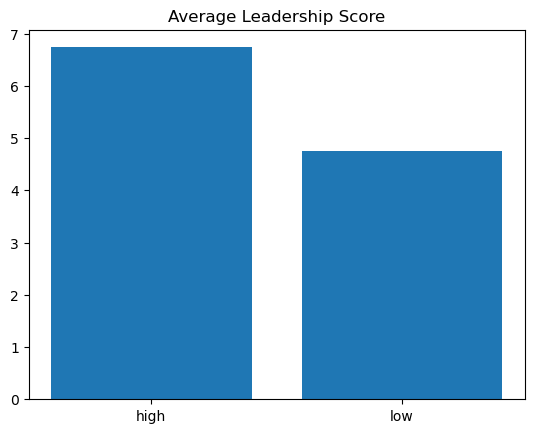

In [7]:
category_average = df.groupby(by ='Performance_Evaluation').mean()
category_average["Leadership"]

plt.bar(x=category_average.index.values, height=category_average["Leadership"])
plt.title("Average Leadership Score")
plt.show

Caption: This shows the difference between average leadership scores of the high performers vs the low performers.

**Develop a correlation matrix that includes all candidate independent variables, then display the correlation matrix in a color-mapped table. Assume all variables are normally distributed and DO NOT require transformations.**

In [8]:
df = df.drop(columns = ['Manager_ID', 'Performance_Evaluation'])
cor_matrix = df.corr()
cor_matrix.style.background_gradient(cmap= 'coolwarm', axis=None, vmin = -1, vmax=1)

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership
Time_Employed,1.000000,0.060079,-0.034257,0.036908,-0.027508
Num_Prev_Positions,0.060079,1.000000,-0.027816,0.011512,-0.028756
Teamwork,-0.034257,-0.027816,1.000000,0.002309,-0.010993
Motivation,0.036908,0.011512,0.002309,1.000000,-0.029894
Leadership,-0.027508,-0.028756,-0.010993,-0.029894,1.000000


**Are there any variable pairs that are multicollinear based on a correlation coefficient value cut-off of 0.6? Explain your answer.**

None of the variables are multicollinear, because none fo them have a correlation coefficient value above 0.6.

##  Unsupervised DM 




**Choose an appropriate and informative unsupervised data mining model. Think about what we're interested in figuring out with this manager performance dataset (performance evaluation) and how many classes we have for this variable. Change one parameter in your unsupervised analysis, based on this.**

### **A**

**Identify which model was selected and why. The why should focus on the types of data variables in the manager performance dataset. Also discuss any parameters changed in the model and why.**

**Selected K means to better understand similar groups that are formed, specifically what traits high performers tend to have.**

### **B**

In [9]:
df = pd.read_csv('/Users/lincolnwhiting/Git Portfolio/Datasets/manager_performance_clean.csv')
%pip install kneed

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from kneed import KneeLocator
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Note: you may need to restart the kernel to use updated packages.


In [10]:
df = pd.get_dummies(df, ['Performance_Evaluation'], drop_first=True)
df.head()

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation_low
0,1,8,2,4,10,8,False
1,2,4,3,8,7,8,False
2,3,3,3,1,7,5,True
3,4,9,1,4,4,5,True
4,5,7,3,3,2,10,True


In [11]:
features = df[["Time_Employed", "Num_Prev_Positions", "Teamwork", "Motivation", "Leadership"]]
features.head()

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership
0,8,2,4,10,8
1,4,3,8,7,8
2,3,3,1,7,5
3,9,1,4,4,5
4,7,3,3,2,10


In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 0.12080363,  0.46866892, -0.45173117,  1.62148164,  0.89952078],
       [-0.74985316,  1.35629945,  0.94465575,  0.57603893,  0.89952078],
       [-0.96751736,  1.35629945, -1.49902136,  0.57603893, -0.13046485],
       ...,
       [-0.96751736,  1.35629945,  0.24646229, -1.51484649, -1.50377901],
       [-0.09686057, -0.41896161, -1.49902136, -0.12092287,  1.58617786],
       [ 1.42678882, -1.30659214, -0.45173117, -0.46940378, -0.13046485]])

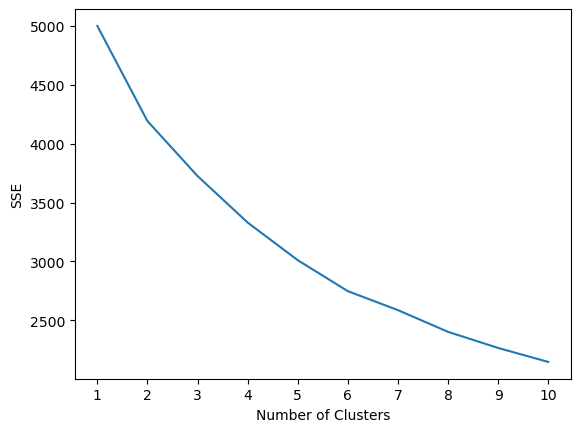

In [13]:
kmeans_elbow = {
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
} 

sse = [] 

for k in range(1,11): 
    kmeans = KMeans(n_clusters=k, **kmeans_elbow) 
    kmeans.fit(scaled_features) 
    sse.append(kmeans.inertia_) 

plt.plot(range(1,11), sse) 
plt.xticks(range(1,11)) 
plt.xlabel("Number of Clusters") 
plt.ylabel("SSE") 
plt.show()

In [14]:
kmeans = KMeans(
    init="random",
    n_clusters = 4, 
    n_init = 10,
    max_iter=300,
    random_state=42,
)


kmeans.fit(scaled_features)
kmeans.inertia_

3333.755635237622

In [15]:
centroids = kmeans.cluster_centers_

centroid_table = pd.DataFrame(centroids,
                              columns=["Time_Employed", "Num_Prev_Positions", "Teamwork", "Motivation", "Leadership"],
                              index=['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3'])

centroid_table

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership
Cluster_0,-0.023399,0.346620,1.033385,-0.062843,-0.752748
Cluster_1,-0.051237,-0.895724,-0.672775,0.212341,-0.593733
Cluster_2,-0.245704,-0.497282,0.385074,-0.042771,1.049727
Cluster_3,0.325021,0.993022,-0.767131,-0.084595,0.120072


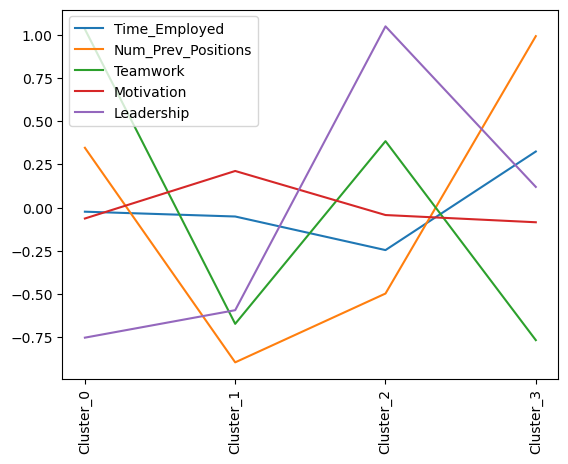

In [16]:
ax = centroid_table.plot()
ax.set_xticks(range(0,len(centroid_table)))
ax.set_xticklabels(centroid_table.index.values, rotation=90) 
plt.show()

**Results interpretation for ALL results generated in 2B**:
* Cluster 0: Those with average  and motivation had lower leadership, but higher teamwork.
* Cluster 1: Those with more previous presitions and leadership had lower teamwork skills.
* Cluster 2: Those who ranked low leadership and teamwork, as well as less previous positions, had much higher motivation.
* Cluster 3: Those with very low number of previous positions scored much higher in motivation and leadership.





### **C**

In [17]:
unscaled = scaler.inverse_transform(centroids)
unscaled_table = pd.DataFrame(unscaled, 
                              columns = ["Time_Employed", "Num_Prev_Positions", "Teamwork", "Motivation", "Leadership"], 
                              index =['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3']) 

unscaled_table

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership
Cluster_0,7.337500,1.862500,8.254167,5.166667,3.187500
Cluster_1,7.209607,0.462882,3.366812,5.956332,3.650655
Cluster_2,6.316176,0.911765,6.397059,5.224265,8.437500
Cluster_3,8.938224,2.590734,3.096525,5.104247,5.729730


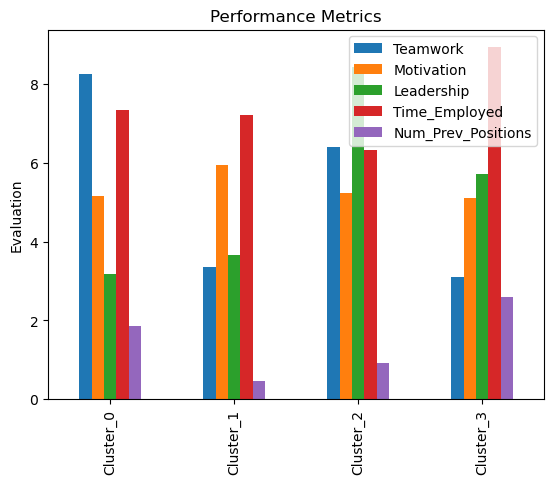

In [18]:
unscaled_table.plot(kind = 'bar', y = ['Teamwork', 'Motivation', 'Leadership','Time_Employed','Num_Prev_Positions'])
plt.title("Performance Metrics")
plt.ylabel("Evaluation")
plt.show()

Those with highest time employed had lower teamwork scores on average (cluster_1,cluster_2)

## **Superviesd DM Technique 1**




Following our clustering analysis, it is best to use decision trees for this dataset. A decision tree analysis ranks feature importance based on our DV (Performance_Evaluation). This will allow us to visualize the importance of candidate characteristics.

## B

In [19]:
df = pd.read_csv('/Users/lincolnwhiting/Git Portfolio/Datasets/manager_performance_clean.csv')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics 


from sklearn import tree 

import seaborn as sns
import graphviz 

In [20]:
x = df.drop(['Manager_ID', 'Performance_Evaluation'], axis=1)
x = pd.get_dummies(data = x, drop_first = False)
y = df['Performance_Evaluation']


In [21]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 100)

In [22]:
model = DecisionTreeClassifier(criterion = "gini", random_state=100,
                               max_depth=9, min_samples_leaf=10)

model.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, random_state=100)

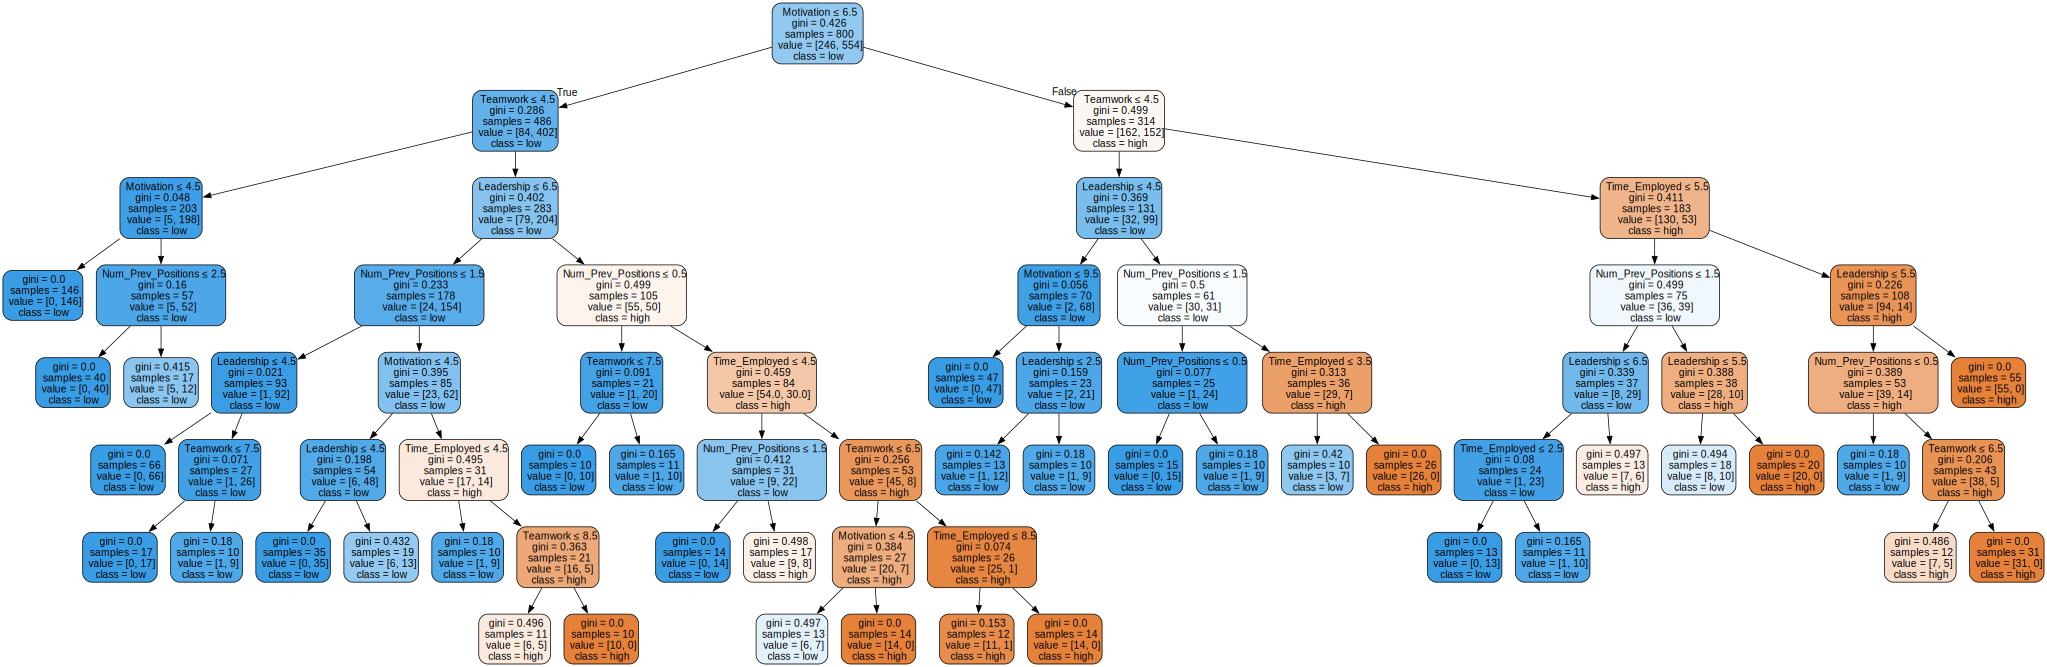

In [23]:
feature_names = x_train.columns if hasattr(x_train, 'columns') else [f"Feature {i}" for i in range(x_train.shape[1])]

class_names = [str(label) for label in sorted(set(y_train))]

dot_data = tree.export_graphviz(
    model, 
    out_file=None, 
    feature_names=feature_names, 
    class_names=class_names, 
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

In [24]:
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [25]:
y_pred = cross_val_predict(model, x_train, y_train, cv = cv)

x_train['predicted_class'] = y_pred 
x_train['actual_class'] = y_train 

In [26]:
df['Performance_Evaluation'].value_counts()
aprior = 687/len(df)

In [27]:
print(classification_report(y_pred, y_train))
kappa = round(metrics.cohen_kappa_score(y_pred, y_train), 2)
lift = round(.89/aprior, 2)
print("Cohen's Kappa score:", kappa)
print("Lift:", lift)

              precision    recall  f1-score   support

        high       0.80      0.82      0.81       239
         low       0.92      0.91      0.92       561

    accuracy                           0.89       800
   macro avg       0.86      0.87      0.87       800
weighted avg       0.89      0.89      0.89       800

Cohen's Kappa score: 0.73
Lift: 1.3


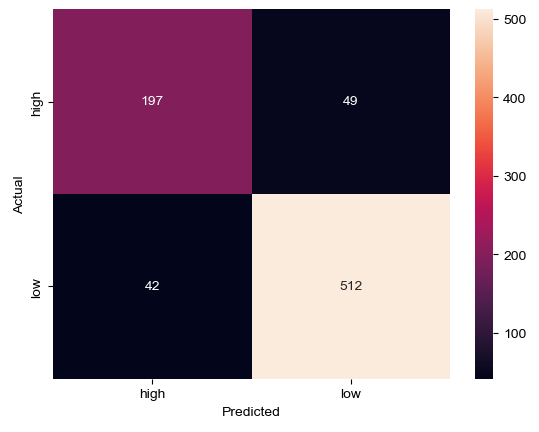

In [28]:
conf = pd.DataFrame(x_train, columns=['actual_class','predicted_class'])
confusion_matrix = pd.crosstab(conf['actual_class'], conf['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
sns.set(rc={'figure.figsize':(12,10)})
plt.show()

**Results interpretation for ALL results generated in 3B:**

Performance_Evaluation_low (positive class = performance WAS found to be low)

*   True positive  (TP): Predicted to be low, was low 512 times.
*   False positive (FP): Predicted to be low, was high 49 times.
*   True negative  (TN): Predicted to be high, was high 42 times.
*   False negative (FN): Predicted to be high, was low 197 times.






## **C**

**Create at least one visualization with a caption or description about how this visualization contributes towards a *meaningful* interpretation of the manager performance data. Draw from the visualization portion of this course, and create your own relevant visualization, label it, and include a brief caption.**

**You may choose to focus on only one or two variables (i.e., it does not need to include all IVs). Imagine you're presenting this analysis to your supervisor or another stakeholder. Create a visualization you would use to illustrate a trend you noted in the Part 3 analysis.**

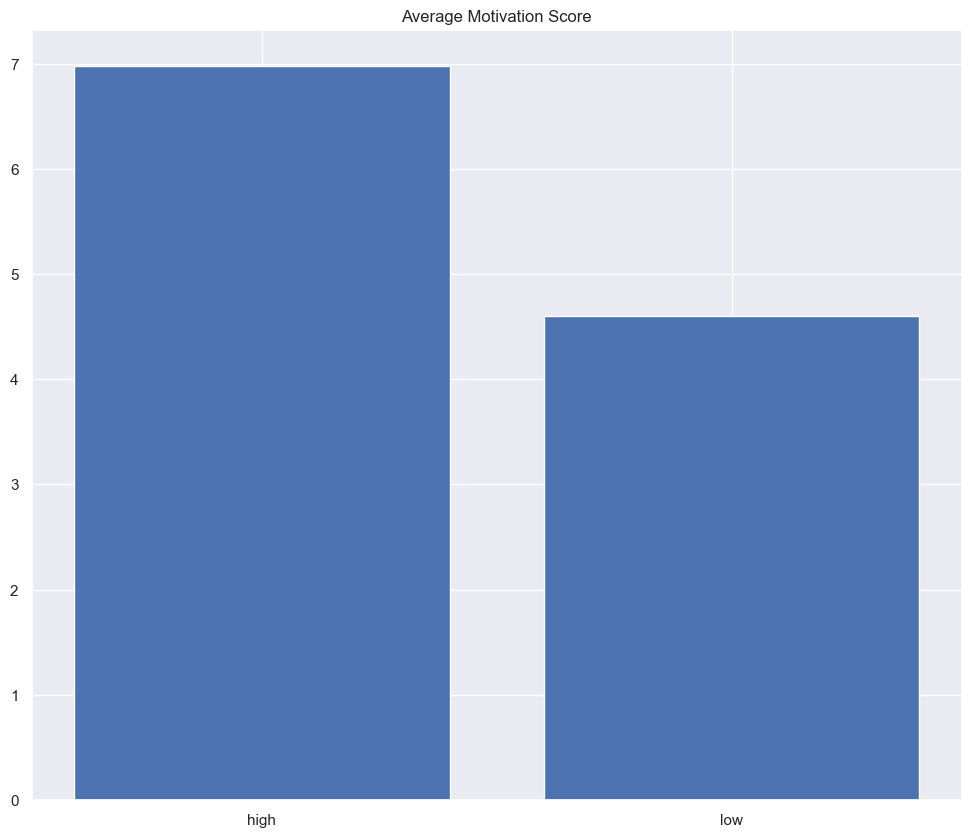

In [29]:
category_avg = df.groupby(by= 'Performance_Evaluation').mean()
category_avg['Motivation']
plt.bar(x=category_avg.index.values, height = category_avg['Motivation'] )
plt.title("Average Motivation Score")
plt.show()

Caption:Because Motivation was at the top of our decision tree, it was our most influental feature. If I were to present to a supervisor or stakeholder, I would focus on the most impactfull score.

## Supervised DM Technique 2

## A

We chose to run a logitic regression model. We are choosing this because we only have 2 outcomes, and because it is useful as a predictive tool to discover which managers will have high performance.



## B

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import statsmodels.api as sm
import seaborn as sns
df = pd.read_csv("/Users/lincolnwhiting/Git Portfolio/Datasets/manager_performance_clean.csv")

In [31]:
x = df.drop(['Manager_ID', 'Performance_Evaluation'], axis=1)
x = pd.get_dummies(data = x, drop_first = False)

y = df['Performance_Evaluation']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 5)
(200, 5)
(800,)
(200,)


In [33]:
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)
model = LogisticRegression()

In [34]:
scoring = {'acc': 'accuracy',
           'f1' : 'f1',
           'precision' : 'precision',
           'recall' : 'recall',
           'roc_auc' : 'roc_auc',
           'r2' : 'r2'}

In [35]:
scores2 = cross_validate(model, x_train, y_train, scoring = scoring, cv = cv, return_train_score=False)

scores2 = pd.DataFrame(scores2, columns = scores2.keys())
scores2.mean()

fit_time          0.002073
score_time        0.003218
test_acc          0.878750
test_f1                NaN
test_precision         NaN
test_recall            NaN
test_roc_auc      0.953672
test_r2                NaN
dtype: float64

In [36]:
print(classification_report(y_pred, y_train))
kappa = round(metrics.cohen_kappa_score(y_pred, y_train), 2)
lift = round(.88/aprior, 2)
print("Cohen's Kappa score:", kappa)
print("Lift:", lift)

              precision    recall  f1-score   support

        high       0.80      0.82      0.81       239
         low       0.92      0.91      0.92       561

    accuracy                           0.89       800
   macro avg       0.86      0.87      0.87       800
weighted avg       0.89      0.89      0.89       800

Cohen's Kappa score: 0.73
Lift: 1.28


In [37]:
scores2.mean()

fit_time          0.002073
score_time        0.003218
test_acc          0.878750
test_f1                NaN
test_precision         NaN
test_recall            NaN
test_roc_auc      0.953672
test_r2                NaN
dtype: float64

In [38]:
y_pred = cross_val_predict(model, x_train, y_train, cv = cv)
metrics.cohen_kappa_score(y_train, y_pred)

0.7117170666468534

In [39]:
df['Performance_Evaluation'].value_counts()

Performance_Evaluation
low     687
high    313
Name: count, dtype: int64

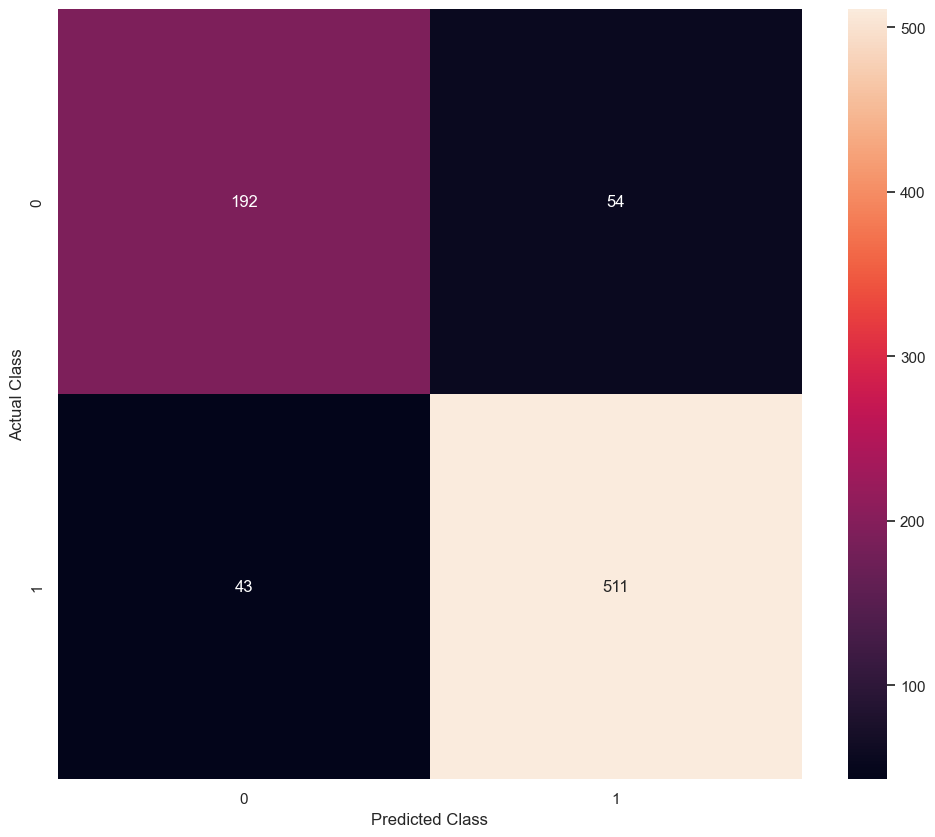

In [40]:
y_pred = cross_val_predict(model, x_train, y_train, cv = cv)
conf = confusion_matrix(y_train, y_pred)

sns.heatmap(conf, annot=True, fmt ='g')
sns.set(rc={'figure.figsize': (12,10)})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

**Results Interpretation**


ROC-AUC is .953, Roc-auc is measured between 0-1, higher indicates that it has high performance, it performs better than random chance which is 50%

TP: 511 predicted low and is actually low

FP: 54 predicted low and is actually high

TN: 192 predicted high and is actually high

FN: 43 predicted high and is actually low

Precision is .903, this means that when the model predicts a positive outcome, in this case low, it is correct about 90.3% of the time while minimizing false positives

Recall is .923, this means that when the model predicts a positive case, it is correct about 92.3% of the time while minimizing false negatives

Kappa is 0.712. This is a good Kappa value because kappa measures how much better the model is performing than chance. This is a good value because kappa is from 0-1, and the closer to 1 the better.

Lift is 1.28. Since lift is from 0 to infinity, the greater lift is the better. A lift of 1.28 shows the model performs 1.28 times better than the baseline prediction at identifying true positive cases.

Cross validated accuracy is 0.8785, The model is 87.5% accurate when used on other data besides the training data

F1 is .912. F1 is measured from 0-1. Being close to 1 indicates that the model has a high level of accuracy in identifying true positive cases while obtaining high precision and high recall.

## **C**

**Visualization and insight presentation**

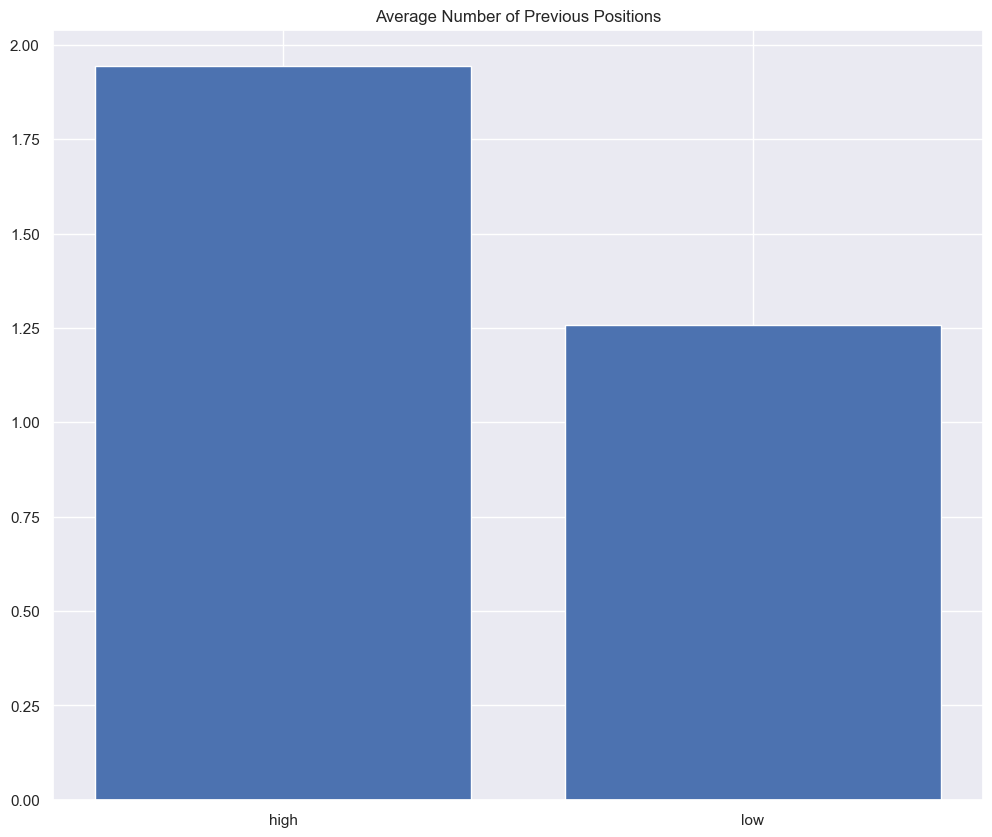

In [41]:
category_avg = df.groupby(by= 'Performance_Evaluation').mean()
category_avg['Num_Prev_Positions']
plt.bar(x=category_avg.index.values, height = category_avg['Num_Prev_Positions'] )
plt.title("Average Number of Previous Positions")
plt.show()

Caption: This shows that those who are rated as high performers tend to have more previous positions worked, which is helpful data when reviewing candidates for managers.

## **Evaluation of Models & Business Recommendations**

In [42]:
model_1 = (0.89,0.92,0.91,0.92)
model_2 = (0.878,0.903,0.923,0.912)

models = model_1, model_2

In [43]:
model_compare = pd.DataFrame(data = models,
                        index = ["model_1", "model_2"],
                        columns = ["test_acc",
                                   "test_precision",
                                   "test_recall",
                                   "test_f1"])
model_compare

,test_acc,test_precision,test_recall,test_f1
model_1,0.890,0.920,0.910,0.920
model_2,0.878,0.903,0.923,0.912


## **B**

**Which model performed the best?**


We should use recall to evaluate performance because a false negative would cost the company more because hiring a manger who is predicted to be be a high perfomer but is actually a low performer would cost the company money. Either in the manager losing the company money or in the company having to fire the manager and hire a new manager.
But a false positive would be a benefit to the company because hiring someone with predicted low performance who actually performs high would just benefit the company.

Based on recall, model 2 is the better performer.

## C

In [44]:

model.fit(x_train, y_train) 

predictions = model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        high       0.86      0.82      0.84        67
         low       0.91      0.93      0.92       133

    accuracy                           0.90       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.90      0.89       200



Accuracy went up from .878 to .90.
F1 went up from .912 to .92.
Precision went up from .903 to .91.
Recall went up from .923 to .93.
The model improved, which shows that it is not overfit. It performed better on the new data showing it is a good model.


## D

**What business recommendations**



The business problem at the beginning was wanting to find a high performing manager based on the various performance metrics. The current managers were surveyed, creating a dataset, which was then used to predict which future candidates would make the best managers. The first step taken was to clean the data and find any underlying patterns. We used k-means clustering, decision trees, and logistic regression models as steps in this process. The logistic regression model was better at preventing false negatives, so we recommend that they use that model. We're confident in the model because it has high accuracy, high cross validated accuracy, precision, recall, and it performs better than the baseline. We would recomend to hire candidates with higher previous # of positions and a higher leadership score on their scale.